<a href="https://colab.research.google.com/github/wldud01/Naver_BoostCourse-DataScience/blob/main/Course2_Analysis_Seoul_hospital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## boost course -data science school
- 강의 2일차
- 서울 종합 병원 분포 확인하기
- 공공 데이터 활용

### 주제

- 서울 종합 병원 분포 확인하기
   - 주어진 가설 - **서울 종합 병원은 고르게 분포되어 있는가?**
- 가상의 문제 설정 해보기
    - 서울 종합 병원 분포를 확인 해야 하는 상황 역으로 생각하기
      - 새로운 종합 병원이 어떤 지역에 필요할까?
        - 환자가 많은 지역
          - 서울 지역 별로 존재하는 종합 병원에 입원 환자 수
        - 사망자가 많은 지역
          - 서울 지역 별 사망자 수 최근 5년 평균
          - 사망 주요 원인 5가지 키워드
        - 응급차가 몰리는 지역
          - 응급차 최근 5년간 출동 지역 분포도
          - 몰리는 지역과 종합병원 분포 비교
        - 가까운 종합병원이 없는 지역
          - 서울 종합병원 분포도** "주어진 가설에 해당 하는 부분"**
          - 그렇다면 왜 종합병원이 없지?
            - 서울 종합 병원이 위치하는 공통적인 특성이 뭘까?
              - 상권이 좋은가? - 상권 분포도 파악
              - 역 주변인가? - 역 위치와의 선형 관계
              - 집값이 싼가? - 위치하는 지역 집값간의 선형 관계 파악
              - 사람이 밀집된 곳인가? - 인구 밀도 확인 및 선형 관계 파악
            - 서울 종합 병원이 없는 지역의 공통적인 특성이 뭘까?
        - 그외(무결성 확보)
        

### 데이터 가져오기

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache-fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (18.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120875 files and direc

In [ ]:
import matplotlib.pyplot as plt
# window 한글 폰트 설정
plt.rc('font', family = 'NanumBarunGothic')
# 그래프가 노트북에 보이도록 설정
plt.rc('axes', unicode_minus =False)
%matplotlib inline

In [ ]:
import glob

data ="./drive/MyDrive/Boostcourse_data_science/data/*.csv"
data_list= glob.glob(data)

In [ ]:
df_hospital = pd.read_csv(data_list[0])

<ipython-input-4-e46132328eb7>:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df_hospital = pd.read_csv(data_list[0])


In [ ]:
class Df_info:

  _object = pd.DataFrame()
  _continuous = pd.DataFrame()
  na = False
  def kind_of_data(self,df):
    # df 열
    df_col = df.columns
    for i in range(0, len(df_col)):
      if (df[df_col[i]].dtypes == 'O')*1 == 1:
        if df[df[df_col[i]].isna()].shape[0] > 0: self.na = True
        self._object[df_col[i]] = df[df_col[i]]
      elif (df[df_col[i]].dtypes == "float")*1 ==1 or (df[df_col[i]].dtypes == "int")*1 ==1:
        if df[df[df_col[i]].isna()].shape[0] > 0: self.na =  True
        self._continuous[df_col[i]] = df[df_col[i]]

    return self._object, self._continuous

  def _info(self,df):
    print("<<<< DATA INFORMATION >>>>")
    print("(row , col):", df.shape)
    print("________________________________________________")
    print("file information", df.info())
    print("_______________________________________________")
    print(f"컬럼 {df.shape[1]}개")
    print(f"결측치 여부는 {self.na}")

data = Df_info()
# 범주형 자료와 수치형 자료 나누기
category, continuous = data.kind_of_data(df_hospital)
print(data._info(df_hospital))

<<<< DATA INFORMATION >>>>
(row , col): (91335, 39)
________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null

- 숫자가 일정하지 않음
  - 결측치가 있음을 예상할 수 있다


In [ ]:
continuous.head()

,상가업소번호,시도코드,시군구코드,행정동코드,법정동코드,지번코드,대지구분코드,지번본번지,지번부번지,도로명코드,건물본번지,건물부번지,구우편번호,신우편번호,경도,위도
0,19956873,41.0,41273.0,4127360000,4.127311e+09,4127310900210810000,1,1081,NaN,412733191011,10,NaN,425764.0,15236.0,126.814295,37.336344
1,20024149,11.0,11680.0,1168065600,1.168012e+09,1168011800204670014,1,467,14.0,116804166604,39,NaN,135270.0,6292.0,127.053198,37.488742
2,20152277,41.0,41390.0,4139059100,4.139013e+09,4139013200217400001,1,1740,1.0,413903199049,178,NaN,429450.0,15066.0,126.734841,37.344955
3,20350610,26.0,26500.0,2650078000,2.650010e+09,2650010400200740001,1,74,1.0,265003131037,688,NaN,613100.0,48266.0,129.115438,35.166872
4,20364049,41.0,41465.0,4146551000,4.146510e+09,4146510100207120002,1,712,2.0,414653205024,32,NaN,448170.0,16837.0,127.095522,37.323528


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_hospital.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4.0,NaN,127.053198,37.488742
2,20152277,조정현신경외과의원,NaN,S,의료,S01,병원,S01B15,신경외과,Q86201,...,4139013200117400001017064,한라프라자,경기도 시흥시 중심상가로 178,429450.0,15066.0,NaN,NaN,NaN,126.734841,37.344955
3,20350610,한귀원정신과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,2650010400100740001009932,NaN,부산광역시 수영구 수영로 688,613100.0,48266.0,NaN,5.0,NaN,129.115438,35.166872
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4146510100107120002026238,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1.0,NaN,127.095522,37.323528


In [ ]:
# tail로 뒤에 데이터 불러오기
df_hospital.tail()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
91330,16196725,온누리약국,베스트,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,3017011200115070000021096,NaN,대전광역시 서구 문예로 67,302831.0,35240.0,NaN,NaN,NaN,127.389865,36.352728
91331,16192180,리원,봄산후조,S,의료,S07,의료관련서비스업,S07A07,산후조리원,S96993,...,4128112300111460000011715,청한프라자,경기도 고양시 덕양구 성신로 14,412827.0,10503.0,NaN,NaN,NaN,126.830144,37.627530
91332,16127538,참좋은요양병원,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,2641010800105380001005572,한신시티빌,부산광역시 금정구 금강로 209,609841.0,46294.0,NaN,2,NaN,129.082790,35.227138
91333,16108681,경희중앙한의원,NaN,S,의료,S01,병원,S01B06,한의원,Q86203,...,1174010500103450009002392,NaN,서울특별시 강동구 천중로 213,134811.0,5303.0,NaN,NaN,NaN,127.143958,37.540993
91334,16109073,천안김안과천안역본점의원,NaN,S,의료,S01,병원,S01B13,안과의원,Q86201,...,4413110700102660017016314,김안과,충청남도 천안시 동남구 중앙로 92,330952.0,31127.0,NaN,NaN,NaN,127.152651,36.806640


In [ ]:
# 업체 종류 수 - 56910 개
df_hospital['상호명'].nunique()

56910

### 결측치 다루기
- isnull().sum()

- plot()/plot.bar()/plot.harh()

- reset_index

- sort_values()

- NaN

- drop()

In [ ]:
# 열의 null의 갯수
null_count=df_hospital.isnull().sum()

<Axes: >

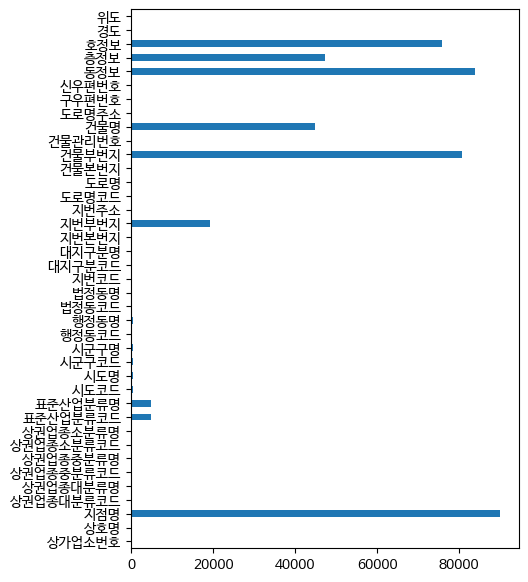

In [ ]:
# 시각화
null_count.plot.barh(figsize=(5,7))

In [ ]:
# reset_index
# 결측치 수를 index로 만들어준다
df_null_count = null_count.reset_index()
df_null_count.head()

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


In [ ]:
# 컬럼명 바꾸기
df_null_count.columns = ["컬럼명","결측치수"]
df_null_count.head()

,컬럼명,결측치수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


In [ ]:
# 결측치 수 순으로 정렬하기 내림 차순
df_null_count_top = df_null_count.sort_values(by=['컬럼명'],ascending =False).head(10)

In [ ]:
# 특정 컬럼만 불러오기
# NaN - not a number
df_hospital["지점명"]

0         NaN
1         NaN
2         NaN
3         NaN
4         수지점
         ... 
91330     베스트
91331    봄산후조
91332     NaN
91333     NaN
91334     NaN
Name: 지점명, Length: 91335, dtype: object

In [ ]:
drop_col = df_null_count_top['컬럼명'].values.tolist()
drop_col

['호정보',
 '행정동코드',
 '행정동명',
 '표준산업분류코드',
 '표준산업분류명',
 '층정보',
 '지점명',
 '지번코드',
 '지번주소',
 '지번부번지']

In [ ]:
# 결측치 많은 top columns 제거
df_hos_drop = df_hospital.drop(drop_col,axis =1)

In [ ]:
print(df_hospital.shape)
df_hos_drop.shape

(91335, 39)


(91335, 29)

In [ ]:
data._info(df_hos_drop)

<<<< DATA INFORMATION >>>>
(row , col): (91335, 29)
________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   상권업종대분류코드  91335 non-null  object 
 3   상권업종대분류명   91335 non-null  object 
 4   상권업종중분류코드  91335 non-null  object 
 5   상권업종중분류명   91335 non-null  object 
 6   상권업종소분류코드  91335 non-null  object 
 7   상권업종소분류명   91335 non-null  object 
 8   시도코드       90956 non-null  float64
 9   시도명        90956 non-null  object 
 10  시군구코드      90956 non-null  float64
 11  시군구명       90956 non-null  object 
 12  법정동코드      91280 non-null  float64
 13  법정동명       91280 non-null  object 
 14  대지구분코드     91335 non-null  int64  
 15  대지구분명      91335 non-null  object 
 16  지번본번지      91335 non-null  int64  
 17  도로명코드      91335 non-null

### Data Summary
- 기초 통계로 데이터의 분포를 살펴보고 시각화하기
- mean
- median
- max
- min
- count
- describe

In [ ]:
# 데이터 요약 모듈 만들어 보기
# 기초 통계 수
def data_summary(df):
  print("<< Data Summmary >>")
  print("columns 별 수치 데이터 요약")
  print(f"_____________________________________________")

  df_column = df.columns
  for i in range(len(df_column)):
    if (df[df_column[i]].dtypes== 'int')*1==1 or (df[df_column[i]].dtypes== 'float')*1==1:
      print(f"columns명: {df_column[i]}")
      print(f"평균:      {df[df_column[i]].mean()}")
      print(f"표준편차:  {df[df_column[i]].std()}")
      print(f"중위수:    {df[df_column[i]].median()}")
      print(f"최대값:    {df[df_column[i]].max()}")
      print(f"최소값:    {df[df_column[i]].min()}")
      print(f"개수:      {df[df_column[i]].count()}")
      print("")
      print(f"평균-표준편차: {df[df_column[i]].mean()-df[df_column[i]].std()}")
      if df[df_column[i]].mean() > df[df_column[i]].median():
        print(f"중위수 < 평균")
      else: print(f"중위수 > 평균")
      print(f"_____________________________________________")

data_summary(df_hos_drop)

<< Data Summmary >>
columns 별 수치 데이터 요약
_____________________________________________
columns명: 상가업소번호
평균:      21218180.559435047
표준편차:  5042828.147111981
중위수:    22119005.0
최대값:    28524703
최소값:    2901108
개수:      91335

평균-표준편차: 16175352.412323065
중위수 > 평균
_____________________________________________
columns명: 시도코드
평균:      32.58671225647566
표준편차:  13.045137615946347
중위수:    41.0
최대값:    50.0
최소값:    11.0
개수:      90956

평균-표준편차: 19.541574640529312
중위수 > 평균
_____________________________________________
columns명: 시군구코드
평균:      32898.38187695149
표준편차:  12985.393171023228
중위수:    41117.0
최대값:    50130.0
최소값:    11110.0
개수:      90956

평균-표준편차: 19912.988705928263
중위수 > 평균
_____________________________________________
columns명: 법정동코드
평균:      3293384644.3064637
표준편차:  1297706281.227762
중위수:    4111710500.0
최대값:    5013032026.0
최소값:    1111010200.0
개수:      91280

평균-표준편차: 1995678363.0787017
중위수 > 평균
_____________________________________________
columns명: 대지구분코드
평균:      1.001335742048

In [ ]:
df_hos_drop.dtypes.head()

상가업소번호        int64
상호명          object
상권업종대분류코드    object
상권업종대분류명     object
상권업종중분류코드    object
dtype: object

In [ ]:
df_hos_drop.describe()

,상가업소번호,시도코드,시군구코드,법정동코드,대지구분코드,지번본번지,도로명코드,건물본번지,건물부번지,구우편번호,신우편번호,경도,위도
count,9.133500e+04,90956.000000,90956.000000,9.128000e+04,91335.000000,91335.000000,9.133500e+04,91335.000000,10604.000000,91323.000000,91333.00000,91335.000000,91335.000000
mean,2.121818e+07,32.586712,32898.381877,3.293385e+09,1.001336,587.534549,3.293207e+11,251.200482,7.241135,428432.911085,28085.47698,127.487524,36.624711
std,5.042828e+06,13.045138,12985.393171,1.297706e+09,0.036524,582.519364,1.297391e+11,477.456487,12.426816,193292.339066,18909.01455,0.842877,1.041361
min,2.901108e+06,11.000000,11110.000000,1.111010e+09,1.000000,1.000000,1.111020e+11,0.000000,1.000000,100011.000000,1000.00000,124.717632,33.219290
25%,2.001931e+07,26.000000,26350.000000,2.635011e+09,1.000000,162.000000,2.635042e+11,29.000000,1.000000,302120.000000,11681.00000,126.914297,35.811830
50%,2.211900e+07,41.000000,41117.000000,4.111710e+09,1.000000,462.000000,4.111743e+11,92.000000,2.000000,440300.000000,24353.00000,127.084550,37.234652
75%,2.480984e+07,43.000000,43113.000000,4.311311e+09,1.000000,858.000000,4.311332e+11,257.000000,9.000000,602811.000000,46044.00000,128.108919,37.507463
max,2.852470e+07,50.000000,50130.000000,5.013032e+09,2.000000,7338.000000,5.013049e+11,8795.000000,244.000000,799801.000000,63643.00000,130.909912,38.499659


In [ ]:
df_hos_drop[["위도","경도"]].describe()

,위도,경도
count,91335.000000,91335.000000
mean,36.624711,127.487524
std,1.041361,0.842877
min,33.219290,124.717632
25%,35.811830,126.914297
50%,37.234652,127.084550
75%,37.507463,128.108919
max,38.499659,130.909912


In [ ]:
# 문자형 데이터 요약
df_hos_drop.describe(include="object")

,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구명,법정동명,대지구분명,도로명,건물관리번호,건물명,도로명주소,동정보
count,91335,91335,91335,91335,91335,91335,91335,90956,90956,91280,91335,91335,91335,46453,91335,7406
unique,56910,1,1,5,5,34,34,17,228,2822,2,16610,54142,17946,54031,556
top,리원,S,의료,S01,병원,S02A01,약국,경기도,서구,중동,대지,서울특별시 강남구 강남대로,1123010300109650001031604,현대아파트,서울특별시 동대문구 약령중앙로8길 10,1
freq,152,91335,91335,60774,60774,18964,18964,21374,3165,874,91213,326,198,131,198,1571


### 3.5 문자열 데이터 요약하기 - pandas 로 시각화 하기
- 기초 통계로 데이터의 분포를 살펴보고 시각화한
- unique() / nunique()
- value_counts()
- barh()/pie chart()

In [ ]:
# 중복을 값 보기
df_hos_drop['상권업종대분류명'].unique()

array(['의료'], dtype=object)

In [ ]:
# unique값 갯수
df_hos_drop['상권업종대분류명'].nunique()

1

In [ ]:
df_hos_drop['상권업종중분류명'].nunique()

5

In [ ]:
# 그룹화된 요약값
# normalize를 하면 비율을 알 수 있다
city = df_hos_drop['시도명'].value_counts(normalize = True)

<Axes: >

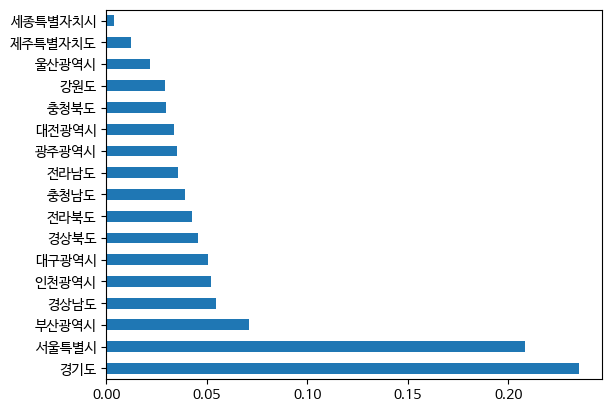

In [ ]:
# 가로 막대 그래
city.plot.barh()

<Axes: ylabel='시도명'>

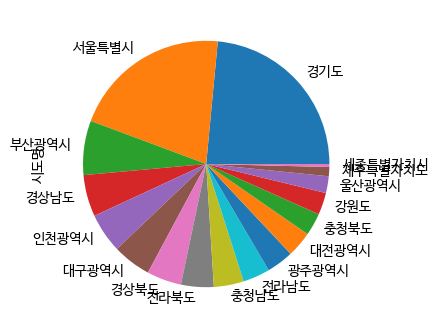

In [ ]:
# 파이 차트는 오해의 소지가 많아서 권장하는 차트는 아니다.
city.plot.pie(figsize=(4,4))

<Axes: xlabel='count', ylabel='시도명'>

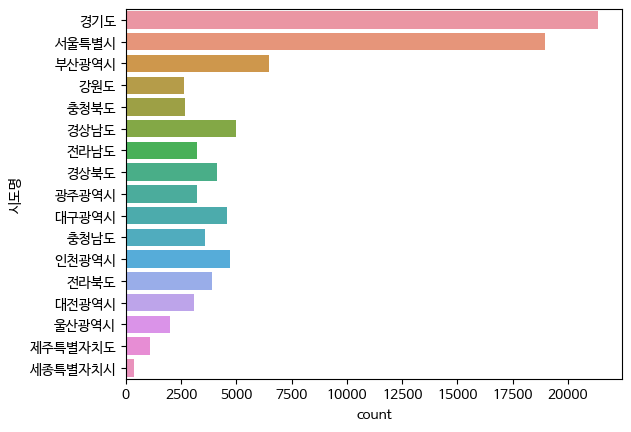

In [ ]:
#seaborn으로 countplot 만들
sns.countplot(data=df_hos_drop, y= "시도명")

<Axes: xlabel='count', ylabel='시도명'>

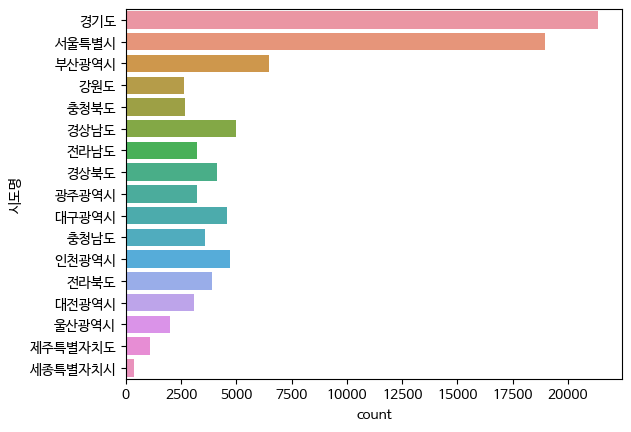

In [ ]:
# seaborn counter plot
sns.countplot(data = df_hos_drop,y="시도명")

In [ ]:
df_hos_drop['상권업종대분류명'].value_counts()

의료    91335
Name: 상권업종대분류명, dtype: int64

In [ ]:
df_hos_drop['상권업종대분류명'].value_counts()

의료    91335
Name: 상권업종대분류명, dtype: int64

In [ ]:
n = df_hos_drop['상권업종중분류명'].value_counts(normalize=True)
n

병원          0.665397
약국/한약방      0.229080
수의업         0.058280
유사의료업       0.041320
의료관련서비스업    0.005923
Name: 상권업종중분류명, dtype: float64

<Axes: >

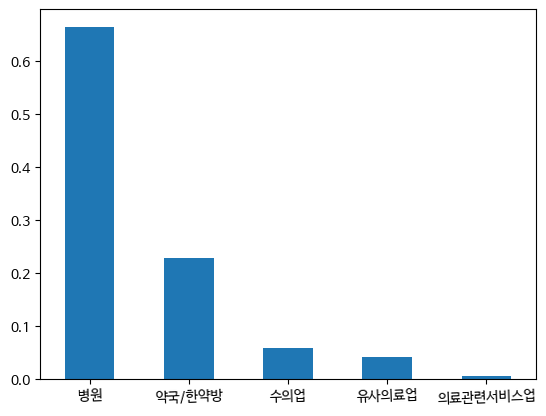

In [ ]:
# bar plot 그리기 - rot으로 글자 각도 조절 가능
n.plot.bar(rot = 2)

<Axes: ylabel='상권업종중분류명'>

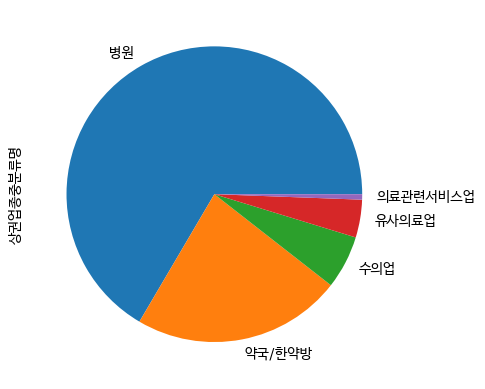

In [ ]:
n.plot.pie()

In [ ]:
# 상권 업종 소분류 명에 대한 그룹화 된 값을 카운트한다
df= df_hos_drop
h = df['상권업종소분류명'].value_counts()

<Axes: >

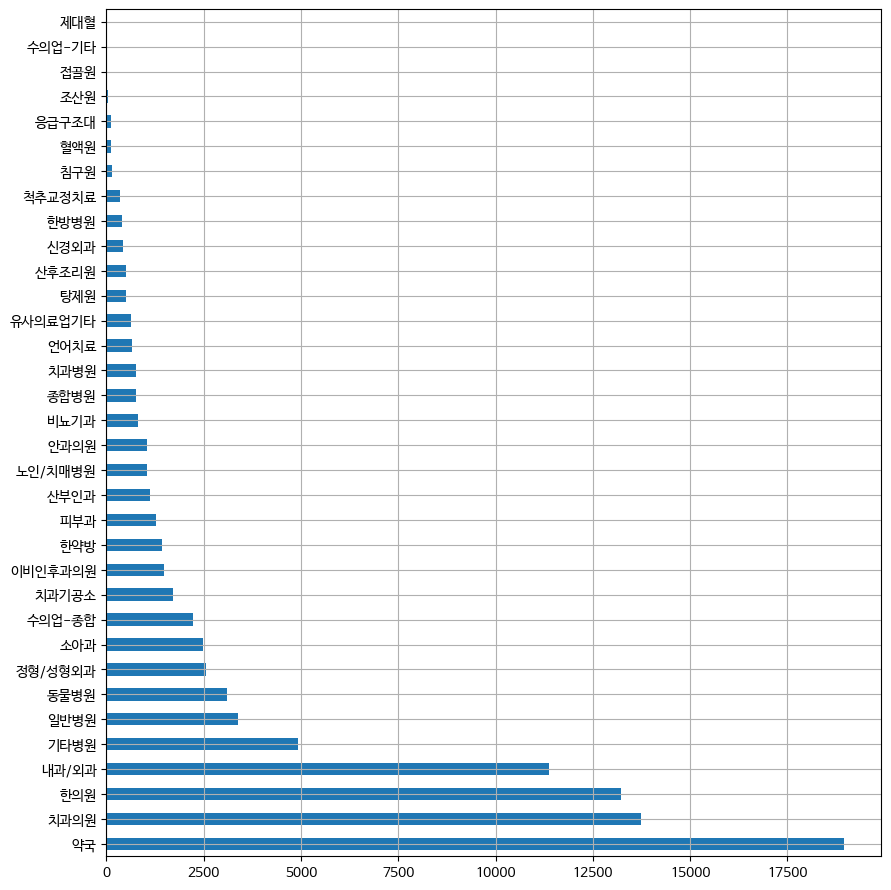

In [ ]:
# 상권 없종 소분류명 bar plot
# grid true를 통해서 그리드로 격자를 그린다
h.plot.barh(figsize = (10,11), grid =True)

### ✨ 원하는 데이터만 따로 추출해오기 - 데이터 색인하기
원하는 데이터 조건을 활용하여 불러온다
- ==

- loc

- boolean indexing

- True / False

- &, |

In [ ]:
# 트겅 데이터를 활용한다
df_medical = df[df['상권업종중분류명'] == "약국/한약방"].copy()
df_medical.head(1)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,경도,위도
4,20364049,더블유스토어수지점,S,의료,S02,약국/한약방,S02A01,약국,41.0,경기도,...,32,NaN,4146510100107120002026238,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,127.095522,37.323528


In [ ]:
#상권 업종 대분류명 의료만 가져오기
# 두번 검색해서 가져오는 방식을 쓸 수 있지만 속도가 느리기 대문에 loc을 써준
condition = df['상권업종대분류명'] == "의료"
df.loc[condition,"상권업종중분류명"].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [ ]:
# 유사의료업만 따라 모아보기

df_medi =  df[df["상권업종중분류명"]=="유사의료업"]
df_medi.shape

(3774, 29)

In [ ]:
df['상호명'].value_counts().head(10)


리원       152
온누리약국    149
경희한의원    141
우리약국     119
중앙약국     111
전자담배      98
조은약국      95
건강약국      87
제일약국      79
사랑약국      73
Name: 상호명, dtype: int64

In [ ]:
df_medi['상호명'].value_counts().head(10)

리원          32
고려수지침       22
대한적십자사      17
헌혈의집        12
고려수지침학회     10
수치과기공소      10
제일치과기공소      9
미소치과기공소      8
아트치과기공소      8
이사랑치과기공소     8
Name: 상호명, dtype: int64

In [ ]:
# 여러 조건으로 색인하기
# 여러 조건을 색인하기 위해서는 and 연산자가 아니라 비트연산자를 써준다.
# & and 조거 | or 조건
# ()를 통해서 연산자들의 우선순위를 잘 정리해주어야 한다.
df_seoul_drug = df[(df["상권업종소분류명"] == "약국" ) & (df["시도명"] == "서울특별시")]
df_seoul_drug.head(1)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,경도,위도
33,20816709,이즈타워약,S,의료,S02,약국/한약방,S02A01,약국,11.0,서울특별시,...,101,NaN,1168010100108210001000001,이즈타워,서울특별시 강남구 테헤란로 101,135080.0,6134.0,NaN,127.028023,37.498656


In [ ]:
display(df_seoul_drug.shape)

(3579, 29)

### 📄텍스트 데이터 전처리 하기
원하는 텍스트 데이터를 추출하고 처리하는 방법

- str.contains
- index
- str.endwith
- len




In [ ]:
### 시군구 명으로 그룹화 해서 갯수
c = df_seoul_drug['시군구명'].value_counts()
c.head()

강남구     374
동대문구    261
광진구     212
서초구     191
송파구     188
Name: 시군구명, dtype: int64

In [ ]:
n = df_seoul_drug['시군구명'].value_counts(normalize=True)
n.head()

강남구     0.104498
동대문구    0.072925
광진구     0.059234
서초구     0.053367
송파구     0.052529
Name: 시군구명, dtype: float64

<Axes: >

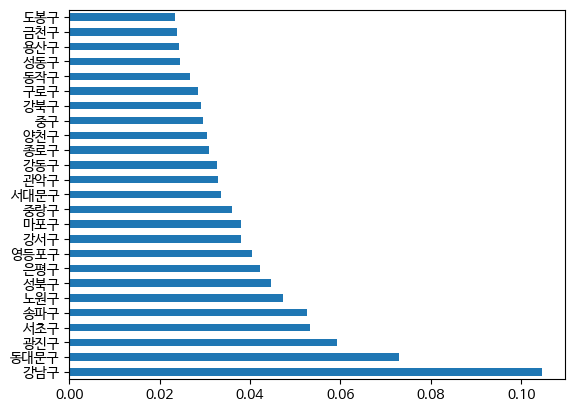

In [ ]:
n.plot.barh()

In [ ]:
# 종합병원
# 시도명이 서울특별시인 데이터만 가져오기
df_seoul_hospital = df[(df["상권업종소분류명"] == "종합병원") & (df["시도명"] == "서울특별시")].copy()
df_seoul_hospital.head(1)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,경도,위도
305,25155642,대진의료재단,S,의료,S01,병원,S01B01,종합병원,11.0,서울특별시,...,119,NaN,1121510100100580025000733,재단법인대순진리회,서울특별시 광진구 긴고랑로 119,143220.0,4944.0,NaN,127.088279,37.559048


<Axes: >

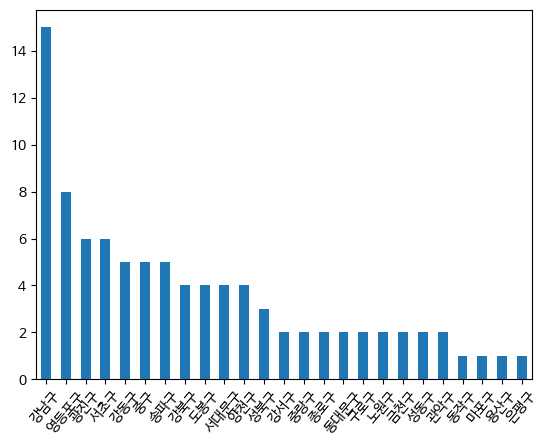

In [ ]:
df_seoul_hospital['시군구명'].value_counts().plot.bar(rot =50)

In [ ]:
df_seoul_hospital['시군구명'].value_counts()

강남구     15
영등포구     8
광진구      6
서초구      6
강동구      5
중구       5
송파구      5
강북구      4
도봉구      4
서대문구     4
양천구      4
성북구      3
강서구      2
중랑구      2
종로구      2
동대문구     2
구로구      2
노원구      2
금천구      2
성동구      2
관악구      2
동작구      1
마포구      1
용산구      1
은평구      1
Name: 시군구명, dtype: int64

In [ ]:
# 텍스트 색인하기 상호명이 아닌 데이터
# str.contains를 사용해서 특정 상호명이 들어간 값만 가져올 수 있다
# ~을 사용해서 조건이 아닌 데이터를 찾을 수 있다

df_seoul_hospital.loc[~df_seoul_hospital['상호명'].str.contains("종합병원"),"상호명"].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '평화드림여의도성모병원의료기매장', '한양', '백산의료재단친구병원',
       '서울보훈병원', '서울성모병원장례식장꽃배달', '서울대학교병원', '알콜중독및정신질환상담소',
       '강남성모병원장례식장꽃배달', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '원자력병원장례식장', '국민의원', '고려대학교구로병원', '학교법인일송학원',
       '삼성의료원장례식장', '희명스포츠의학센터인공신장실', '연세대학교의과대학강남세브란스', '국립정신병원',
       '코아클리닉', '수서제일의원', '사랑의의원', '한국전력공사부속한일병원', '신촌연세병원', '창동제일의원',
       '영동세브란스병원', '제일성심의원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울이의원',
       '서울대학교병원비상계획외래', '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '독일의원',
       '서울연합의원', '우신향병원', '동부제일병원', '아산재단금강병원', '명곡안연구소', '아산재단서울중앙병원',
       '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원', '한국건강관리협회서울특',
       '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', '실로암의원', 'Y&T성모마취과', '광진성모의원',
       '서울현대의원', '이노신경과의원', '송정훼밀리의원', '서울중앙의원', '영남의료재단', '인제대학교서울백병원',
       '한국필의료재단', '세브란스의원', '가톨릭대학교성바오로병원장례식장', '서울연세의원', '사랑의병원',
       '성삼의료재단미즈메디병원', '씨엠충무병원', '성신의원', '원진재단부설녹색병원', '송파제일의원',
       '카톨릭성모의원', '한양성심의원', '관악

In [ ]:
df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("꽃배달")]

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,경도,위도
2803,20895655,서울성모병원장례식장꽃배달,S,의료,S01,병원,S01B01,종합병원,11.0,서울특별시,...,55,NaN,1165010700105510000017194,NaN,서울특별시 서초구 사평대로28길 55,137040.0,6578.0,1,127.000682,37.498257
4644,22020310,강남성모병원장례식장꽃배달,S,의료,S01,병원,S01B01,종합병원,11.0,서울특별시,...,56,24.0,1165010700105470006016762,이이빌딩,서울특별시 서초구 반포대로39길 56-24,137040.0,6578.0,NaN,127.001756,37.499095


In [ ]:
df_seoul_hospital[df_seoul_hospital['상호명'].str.contains("의료기")]

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,경도,위도
1917,23210677,평화드림여의도성모병원의료기매장,S,의료,S01,병원,S01B01,종합병원,11.0,서울특별시,...,10,NaN,1156011000100620000031477,여의도성모병원,서울특별시 영등포구 63로 10,150713.0,7345.0,NaN,126.936693,37.518296


In [ ]:
drop_index = df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("꽃배달|상담소|장례식장|의료기|어린이집")].index
drop_index =drop_index.tolist()
drop_index

[1917, 2803, 4431, 4644, 7938, 10283, 47008, 60645, 70177]

In [ ]:
drop_index_2 = df_seoul_hospital[df_seoul_hospital["상호명"].str.endswith("의원")].index
drop_index_2 = drop_index_2.tolist()
drop_index_2

[8479,
 12854,
 13715,
 14966,
 16091,
 18047,
 20200,
 20415,
 30706,
 32889,
 34459,
 34720,
 35696,
 37251,
 45120,
 49626,
 51575,
 55133,
 56320,
 56404,
 56688,
 57551,
 62113,
 76508]

In [ ]:
drop_row_all = drop_index + drop_index_2
len(drop_row_all)

33

In [ ]:
# 전처리 전후 데이터 비교
display(df_seoul_hospital.shape)
df_seoul_hospital_drop = df_seoul_hospital.drop(drop_row_all, axis= 0)
display(df_seoul_hospital_drop.shape)

(91, 29)

(58, 29)

<Axes: >

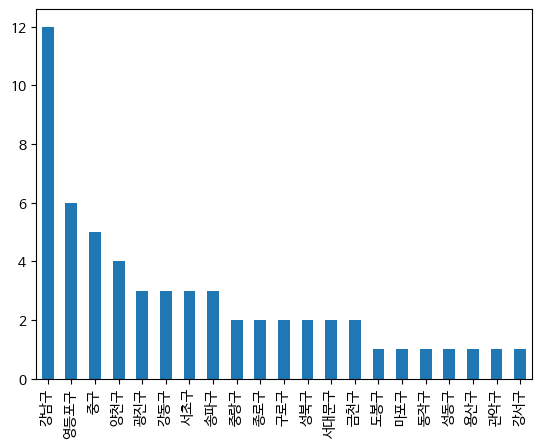

In [ ]:
# 시군구명에 따라 종합병원의 숫자를 countplot
df_seoul_hospital_drop["시군구명"].value_counts().plot.bar()

<Axes: xlabel='count', ylabel='시군구명'>

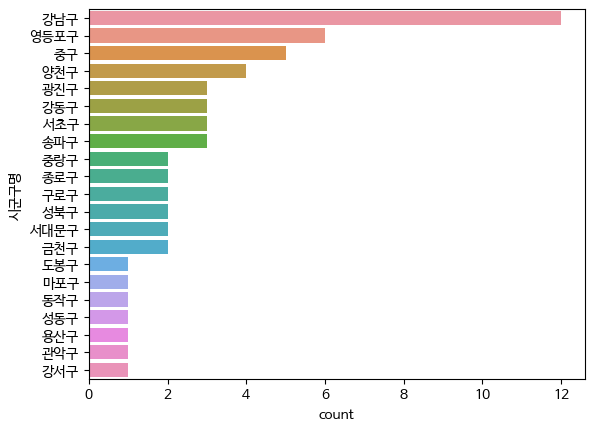

In [ ]:
# seaborn으로 그리기
sns.countplot(data=df_seoul_hospital_drop,y="시군구명",
              order = df_seoul_hospital_drop
               ["시군구명"].value_counts().index)

In [ ]:
df_seoul_hospital_drop["상호명"].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '한양', '백산의료재단친구병원', '서울보훈병원',
       '서울대학교병원', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '고려대학교구로병원', '학교법인일송학원', '희명스포츠의학센터인공신장실',
       '연세대학교의과대학강남세브란스', '국립정신병원', '코아클리닉', '한국전력공사부속한일병원', '신촌연세병원',
       '영동세브란스병원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울대학교병원비상계획외래',
       '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '우신향병원', '동부제일병원', '아산재단금강병원',
       '명곡안연구소', '아산재단서울중앙병원', '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원',
       '한국건강관리협회서울특', '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', 'Y&T성모마취과',
       '영남의료재단', '인제대학교서울백병원', '한국필의료재단', '사랑의병원', '성삼의료재단미즈메디병원',
       '씨엠충무병원', '원진재단부설녹색병원', '강남센트럴병원', '우리들병원', '건국대학교병원', '서울적십자병원',
       '서울성모병원응급의료센터', '가톨릭대학교여의도성모병원', '씨엠병원'], dtype=object)

### 📈 위경도 데이터 scatterplot 으로 표현하기
원하는 데이터를 그래프로 시각화하는 방법을 알아본다
- scatter plot

In [ ]:
# 이전에는 종합병원이라고 무관하다고 생각된 데이터를 제거해 주었다
df_seoul = df[df["시도명"] == "서울특별시"].copy()
df_seoul

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,경도,위도
1,20024149,타워광명내과의원,S,의료,S01,병원,S01B07,내과/외과,11.0,서울특별시,...,39,NaN,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,127.053198,37.488742
8,20808534,코원성형외과,S,의료,S01,병원,S01B08,정형/성형외과,11.0,서울특별시,...,826,NaN,1168010700105920004010990,이가빌딩,서울특별시 강남구 논현로 826,135893.0,6025.0,NaN,127.028531,37.522223
9,20755460,헬로스마일소아과,S,의료,S01,병원,S01B11,소아과,11.0,서울특별시,...,30,NaN,1168010800100390018000001,성도빌딩,서울특별시 강남구 논현로131길 30,135010.0,6045.0,NaN,127.027878,37.514144
31,20872995,고운나라성형외과,S,의료,S01,병원,S01B08,정형/성형외과,11.0,서울특별시,...,1032,NaN,1174010800100090005004868,NaN,서울특별시 강동구 천호대로 1032,134030.0,5379.0,NaN,127.126507,37.537333
33,20816709,이즈타워약,S,의료,S02,약국/한약방,S02A01,약국,11.0,서울특별시,...,101,NaN,1168010100108210001000001,이즈타워,서울특별시 강남구 테헤란로 101,135080.0,6134.0,NaN,127.028023,37.498656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91318,16190911,동민피부과비뇨기과,S,의료,S01,병원,S01B12,비뇨기과,11.0,서울특별시,...,147,NaN,1123010700102350001013495,미주아파트,서울특별시 동대문구 약령시로 147,130781.0,2489.0,NaN,127.045802,37.583788
91319,16108560,씨앤디자인치과기공소,S,의료,S03,유사의료업,S03B06,치과기공소,11.0,서울특별시,...,234,NaN,1154510100100600025000001,에이스하이엔드타워6차,서울특별시 금천구 벚꽃로 234,153798.0,8513.0,NaN,126.886122,37.475986
91320,16131813,월계치과,S,의료,S01,병원,S01B04,치과의원,11.0,서울특별시,...,338,NaN,1135010200109420000018688,월계역신도브래뉴,서울특별시 노원구 월계로 338,139847.0,1885.0,NaN,127.057988,37.629326
91322,16091491,설연화한복감성약방,S,의료,S02,약국/한약방,S02A01,약국,11.0,서울특별시,...,28,NaN,1126010400101740001009985,NaN,서울특별시 중랑구 공릉로 28,131848.0,2034.0,NaN,127.078082,37.613194


In [ ]:
df_seoul.shape

(18943, 29)

<Axes: >

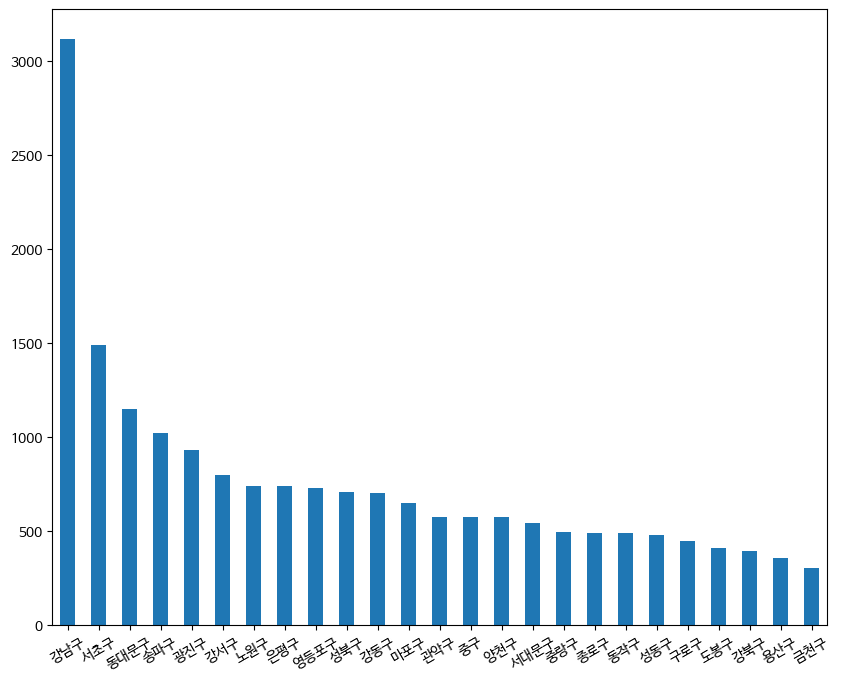

In [ ]:
# 서울 특별시에 병원이 어느 시군구에 많이 존재할까?
df_seoul["시군구명"].value_counts().plot.bar(figsize=(10,8), rot = 30)

<Axes: xlabel='시군구명', ylabel='count'>

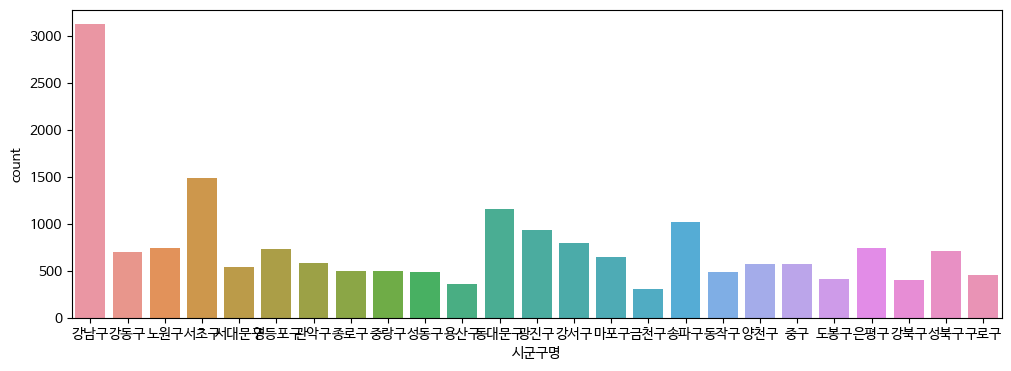

In [ ]:
plt.figure(figsize = (12,4))
sns.countplot(data=df_seoul,x = "시군구명")

<Axes: xlabel='경도', ylabel='위도'>

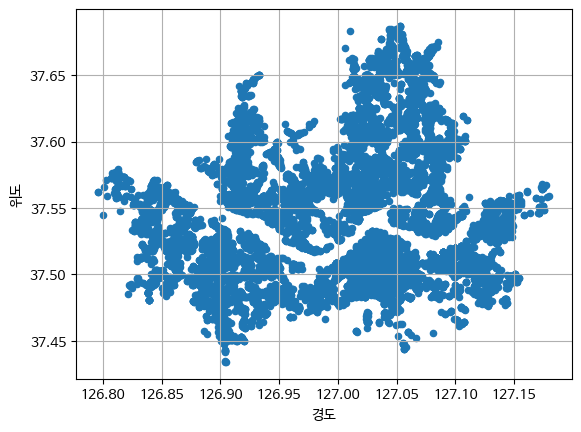

In [ ]:
# pandas로 위도와 경도 표시하기
df_seoul[["경도","위도","시군구명"]].plot.scatter(x="경도", y="위도", grid=True)

<Axes: xlabel='경도', ylabel='위도'>

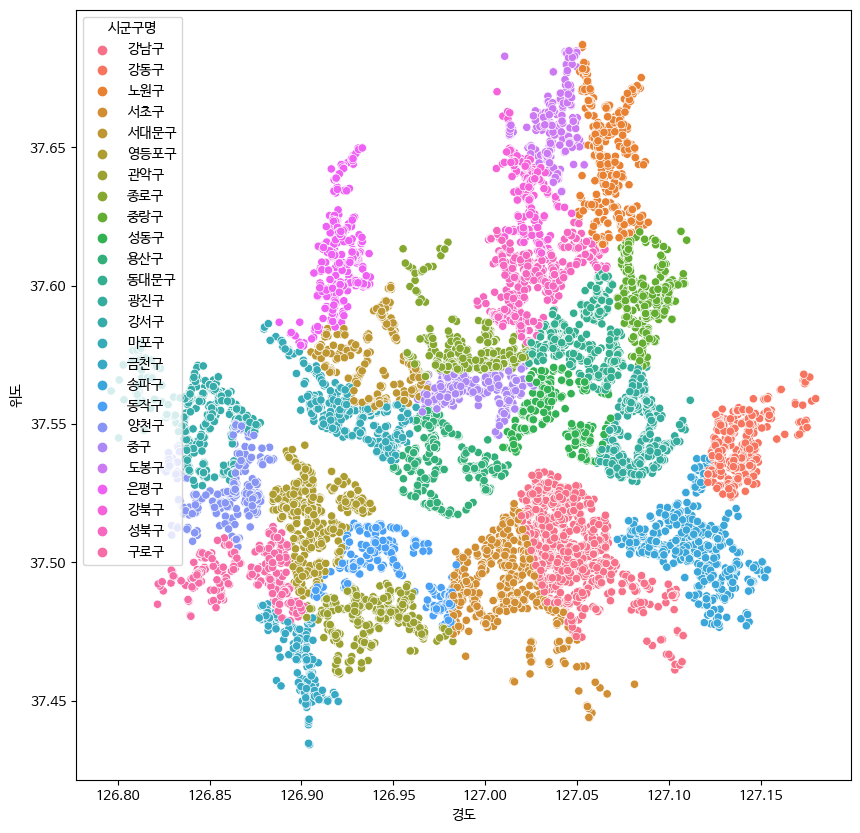

In [ ]:
# seaborn으로 scatterplot 그려보기
plt.figure(figsize = (10,10))
sns.scatterplot(data=df_seoul, x= "경도", y="위도", hue = "시군구명")

<Axes: xlabel='경도', ylabel='위도'>

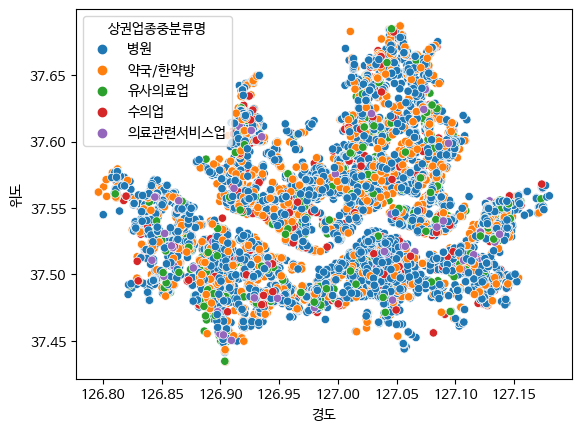

In [ ]:
# 상권 업종 중분류명
sns.scatterplot(data=df_seoul,x="경도",y="위도",hue="상권업종중분류명")

<Axes: xlabel='경도', ylabel='위도'>

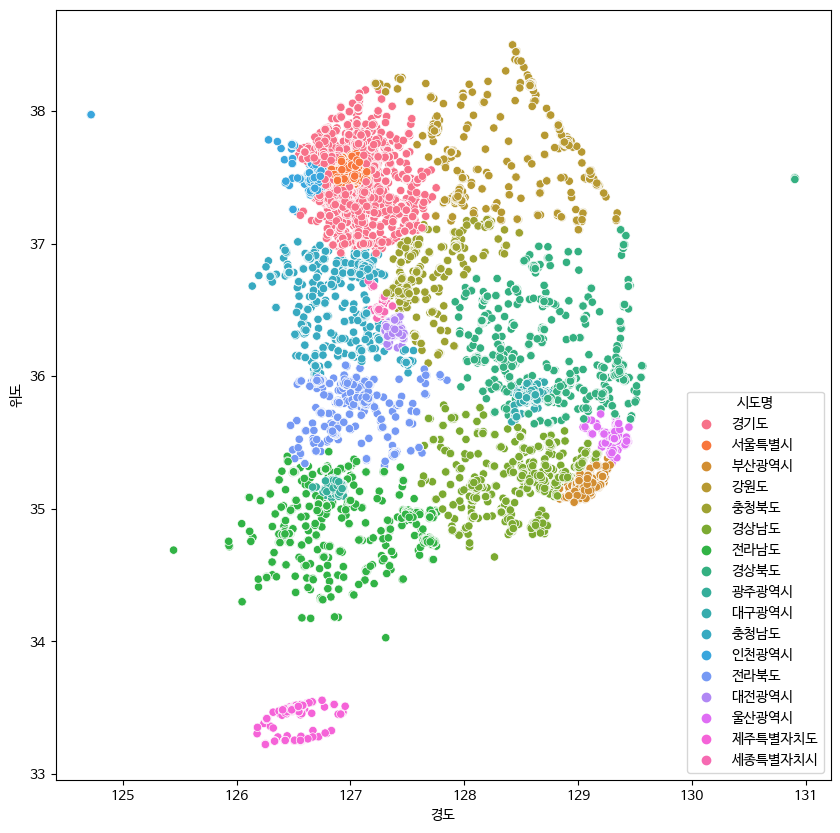

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df,x="경도",y="위도",hue="시도명")

### 🗺️ folium 으로 위경도와 주소데이터를 활용해 지도에 표현하기
folium으로 위경도와 주소 데이터를 지도에 표현하는 방법을 알아본다
- folium
- map
- marker

In [ ]:
# folium 설치
!pip install folium

In [ ]:
# scatter plot 좌표에 어디에 위치해 있는지 표현하기 좋음
# 상관계수 회귀선등등에도 사용됨
import folium
m = folium.Map(location=[0,0], zoop_sart =12,
               tiles="stamen Terrain")
tooltip = "Click"

folium.Marker([0,0],popup='<i>mt.</i>', tooltip=tooltip).add_to(m)
m

In [ ]:
df['상권업종중분류명'].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [ ]:
# 서울 특별시에 있는 병원 지도 위에 표기해보기
df_seoul_hospital = df[(df["시도명"] == "서울특별시")&(df["상권업종중분류명"]=="병원")]

In [ ]:
df_sh = df_seoul_hospital[["경도","위도","시군구명","상호명"]]
df_sh.head()

,경도,위도,시군구명,상호명
1,127.053198,37.488742,강남구,타워광명내과의원
8,127.028531,37.522223,강남구,코원성형외과
9,127.027878,37.514144,강남구,헬로스마일소아과
31,127.126507,37.537333,강동구,고운나라성형외과
41,127.064245,37.639918,노원구,이태형한의원


In [ ]:
df_sh_index=df_sh.index.tolist()
df_sh_index[0]

1

In [ ]:
df_seoul_hospital["위도"].mean()
df_seoul_hospital["경도"].mean()

127.00404931896101

In [ ]:
seoul_hos = folium.Map([df_seoul_hospital["위도"].mean(),df_seoul_hospital["경도"].mean()],
                       zoop_start= 15)
tooltip ="서울특별시 병원 평균"
folium.Marker([df_seoul_hospital["위도"].mean(),df_seoul_hospital["경도"].mean()],tooltip=tooltip).add_to(seoul_hos)
seoul_hos

In [ ]:
# 데이터 전부는 출력이 되지 않으나 수를 적게 하니까 출력됨
# 영상 보기 전에 먼저 시도하기
for i in range(0,df_sh.shape[0]//100):
  tooltip = df_sh['상호명'][df_sh_index[i]]
  folium.Marker([df_sh["위도"][df_sh_index[i]],df_sh["경도"][df_sh_index[i]]],tooltip=tooltip).add_to(seoul_hos)
seoul_hos

In [ ]:
#지도 그려주기
# 분석가께서 설명해주신 코드
for n in df_seoul_hospital.index[:20]:
  name= df_seoul_hospital.loc[n,"상호명"]
  address = df_seoul_hospital.loc[n,"도로명주소"]
  pop= f"{name}-{address}"
  location= [df_seoul_hospital.loc[n,"위도"],df_seoul_hospital.loc[n,"경도"]]
  folium.Marker(
      location = location,
      popup = pop,
      tooltip = name ,
  ).add_to(seoul_hos)
seoul_hos